# Analiza

*Analiza Madžarske metode na naključnih matrikah.*

In [60]:
from HM import *
from statistics import analysis
import numpy as np
import matplotlib.pyplot as plt

Napišemo funkcijo, ki bo sprejela število, ki predstavlja koliko matrik bomo naenkrat analizirali, spodnjo in zgornjo mejo za cela števila v naključnih matrikah, velikost matrike, katere vrste problem rešujemo in ali bomo na koncu izrisali porazdelitev optimalne cene.

In [83]:
def fun(N, lb, hb, size, problem_sort, draw):
    matrix_lst = []
    for i in range(N):
        A = np.random.randint(lb, high=hb, size=(size[0],size[1]))
        matrix_lst.append(A)
    (wd, td, weights, time) = analysis(matrix_lst, problem_sort)
    if draw == 1:
        hx, hy, _ = plt.hist(weights, bins=30, density=True, color="lightblue")
        plt.ylim(0.0, max(hx)+0.05)
        plt.title('Weights distribution')
        plt.grid()
        plt.savefig('picture{}'.format(N+lb+hb) + problem_sort + '.png')
        plt.show()
    return (wd, td, weights, time)

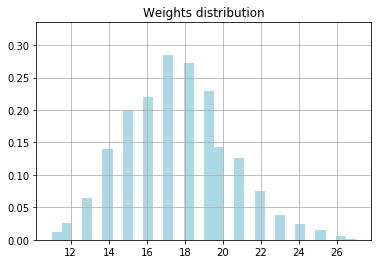

{'average weight': 17.599, 'max weight': 27, 'min weight': 11}
{'average time': 0.00236, 'max time': 0.012192, 'min time': 0.000561}


In [84]:
N = 1000
lower_bound = 1
higher_bound = 10
size10 = (10,10)
(wd10, td10, weights10, time10) = fun(N, lower_bound, higher_bound, size10, "min", 1)
print(wd10)
print(td10)

In [85]:
print(wd10['average weight'])
print(np.var(weights10))

17.599
7.572199


Izgleda kot normalna porazdelitev z povprečjem okrog 17,6 in varianco okrog 7,6.

To je bilo za problem najcenejšega prirejanja. Kaj pa za problem najdražjega prirejanja?

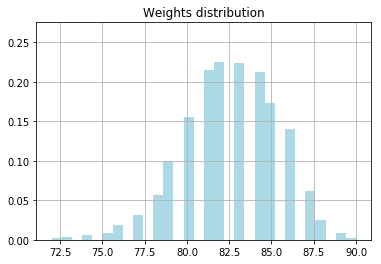

{'average weight': 82.467, 'max weight': 90, 'min weight': 72}
{'average time': 0.00236, 'max time': 0.011481, 'min time': 0.000614}


In [86]:
(wd10max, td10max, weights10max, time10max) = fun(N, lower_bound, higher_bound, size10, "max", 1)
print(wd10max)
print(td10max)

V povprečju imamo optimalno težo enako 82,4. Zna se zgoditi tudi, kar se v tem primeru je, da dobimo največjo ceno, kar je 90.

Oba problema imata povprečen čas pod 0.01 sekund. Čas izvajanja je odvisen od velikosti in tudi strukture matrike.

Kaj se zgodi, če povečamo velikost matrike. Pogledali si bomo samo za primer najcenjšega prirejanja.

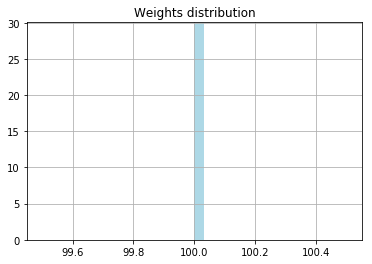

{'average weight': 100.0, 'max weight': 100, 'min weight': 100}
{'average time': 1.627091, 'max time': 2.503931, 'min time': 0.536118}


In [87]:
N100 = 100
lower_bound = 1
higher_bound = 10
size100 = (100,100)
(wd100, td100, weights100, time100) = fun(N100, lower_bound, higher_bound, size100, "min", 1)
print(wd100)
print(td100)

Povprečen čas je znatno večji, ker smo imeli večjo matriko. Opazi se tudi velika razlika med maksimalnim in minimalnim časom, kar pomeni, da je struktura matrike oz. porazdelitev števil v matriki pomembna za hitrost algoritma.

Opazimo, da je optimalna cena za vseh 100 matrik kar zmeraj enaka 100, kar je tudi minimalna cena glede na naše začetne podatke. To pomeni, da je bila v vsaki vrstici in stolpcu v vsaki matriki vsaj ena enka. To je možno, ker imamo elemente matrike med 1 in 9. Če bi imeli elemente na večjem intervalu, se to ne bo zgodilo. Primer:

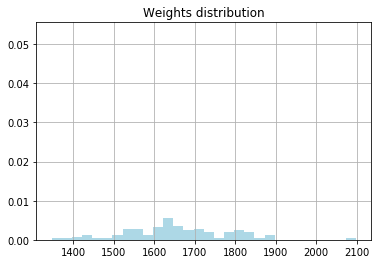

{'average weight': 1654.52, 'max weight': 2098, 'min weight': 1346}
{'average time': 2.385538, 'max time': 3.534982, 'min time': 1.405796}


In [88]:
N100 = 100
lower_bound = 1
higher_bound = 1000
size100 = (100,100)
(wd101, td101, weights101, time101) = fun(N100, lower_bound, higher_bound, size100, "min", 1)
print(wd101)
print(td101)

Ker smo imeli veliko večji razpon števil v matrikah, je temu primeren tudi večji razpon optimalnih cen.

Opazimo tudi, da se je čas tudi povečal. Torej je čas algoritma odvisen tudi od razpona števil v matriki cen.

Sedaj pa si še poglejmo, kako raste čas z večanjem velikosti matrike cen.

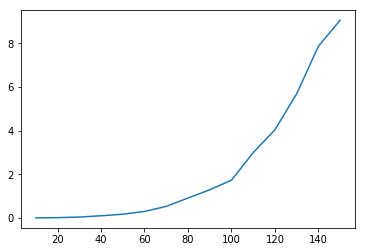

In [91]:
M = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
N10= 10
lower_bound = 1
higher_bound = 100
time_lst = []
for m in M:
    (wd, td, weights, time) = fun(N10, lower_bound, higher_bound, (m,m), "min", 0)
    time_lst.append(td['average time'])

plt.plot(M, time_lst)
plt.savefig('algorithem_time.png')

Za primerjavo si narišimo funkcijo $f(x) = x^3$ in to delimo z številom operacij, ki jih računalnik naredi v eni sekundi. S tem bomo dobili oceno, koliko časa računalnik porabi za izvedbo algoritma. Boljši namizni računalniki naj bi naredili $10^8$ operacij v eni sekundi. Ker imam slabši računalnik, bom delil z $10^6$.

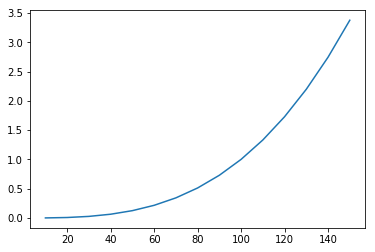

In [77]:
y = np.power(M,3)/(np.power(10,6))
plt.plot(M,y)

Smo v pravem velikostnem razredu časov.

S tem smo hoteli potrditi, da je časovna zahtevnost algoritma $O(n^3)$, kjer je $n$ veliksot matrike cen.